# Import Packages

In [55]:
# Import packages
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
import matplotlib as mpl
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

from cycler import cycler

# Adjust Plot Styles

In [59]:
# Adjust matplotlib's style using custom made style sheet
plt.style.use('presentation.mplstyle')

# highlight parts on graphs
facecolor = "lightgrey" 

# Fonts for plots
plt.rcParams.update({'font.family':'sans-serif'}) # set the font globally
plt.rcParams.update({'font.sans-serif':'Computer Modern Sans Serif'}) # set the font name for a font family
print(plt.rcParams['font.family'])
print(plt.rcParams['font.sans-serif'])


['sans-serif']
['Computer Modern Sans Serif']


# Exploratory Data Analysis

In [45]:
# Load data
sales = pd.read_csv('data/business.retailsales.csv')
sales2 = pd.read_csv('data/business.retailsales2.csv')

In [46]:
# View data from business.retails.csv
display(sales)
# There are 1774 product entries with net quatity sold, gross sales, discounts and returns

# rename the columns to exlude spaces
sales.columns = sales.columns.str.replace(' ', '_')

# rename the product type values to exclude spaces
sales['Product_Type'] = sales['Product_Type'].str.strip()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


## Data Distribution

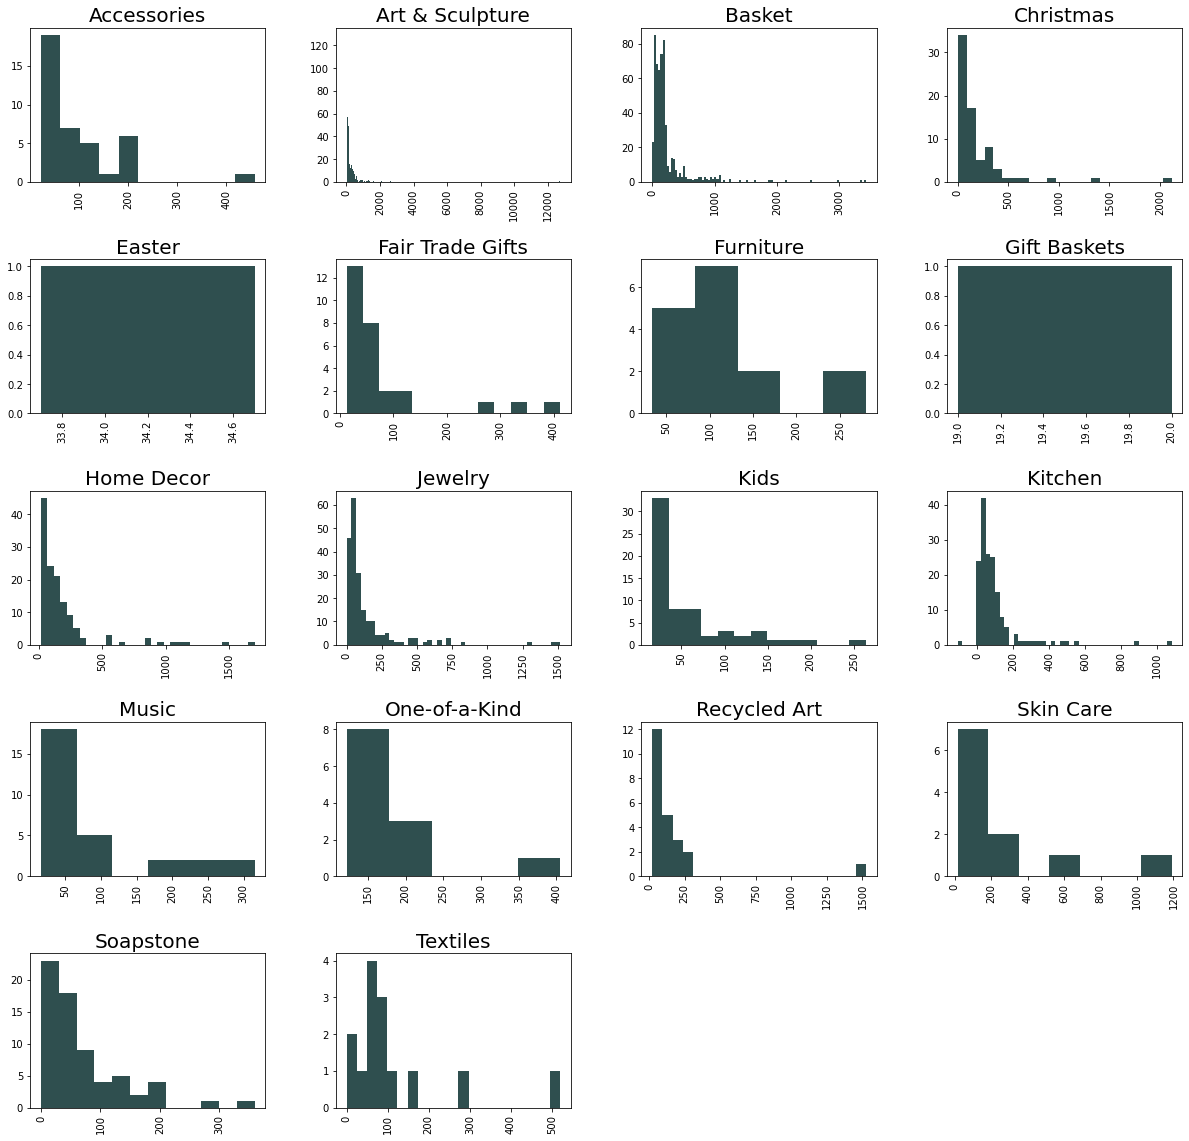

In [47]:
# plot histograms of total net sales for each product
plot = sales['Total_Net_Sales'].hist(by=sales['Product_Type'], bins='auto', grid=False, figsize=(20,20))

In [48]:
# make a table with stadard deviation and standard error for total net sales

# remove nans from sales dataset
sales = sales.dropna()
sales.isnull().values.any()

# create table 
total_sales = sales.groupby('Product_Type').agg([np.mean, np.std, sp.sem, np.min, np.max])

# Round all values
total_sales = total_sales.round()

# rearange columns so that total net sales is first
cols = total_sales.columns.tolist()
cols = cols[-5:] + cols[:-5]
total_sales = total_sales[cols]

# rearange rows from highest to lowest for total net sales
total_sales = total_sales.sort_values([('Total_Net_Sales','mean')], ascending=False)

display(total_sales)

Total_Net_Sales                               Net_Quantity  \
                            mean    std    sem   amin     amax         mean   
Product_Type                                                                  
Art & Sculpture            251.0  749.0   41.0   13.0  12732.0          4.0   
Basket                     245.0  366.0   16.0    0.0   3427.0          3.0   
Skin Care                  234.0  357.0  108.0   17.0   1189.0          9.0   
Christmas                  198.0  313.0   37.0    0.0   2114.0          8.0   
Home Decor                 196.0  275.0   24.0   18.0   1701.0          3.0   
One-of-a-Kind              176.0   79.0   23.0  122.0    405.0          1.0   
Recycled Art               161.0  305.0   64.0   21.0   1525.0          4.0   
Jewelry                    141.0  217.0   15.0    0.0   1517.0          5.0   
Textiles                   120.0  134.0   36.0    0.0    520.0          3.0   
Furniture                  117.0   72.0   18.0   34.0    280.0          2.0   
Accessories                 97.0   81.0   13.0   22.0    458.0          2.0   
Kitchen                     95.0  136.0   11.0 -106.0   1078.0          5.0   
Music                       83.0   89.0   16.0   16.0    315.0          3.0   
Fair Trade Gifts            79.0   98.0   18.0   12.0    412.0          4.0   
Soapstone                   69.0   68.0    8.0    0.0    359.0          3.0   
Kids                        59.0   50.0    6.0   16.0    264.0          2.0   
Easter                      34.0    NaN    NaN   34.0     34.0          1.0   
Gift Baskets                20.0    NaN    NaN   20.0     20.0          1.0   

                                       ... Discounts                         \
                   std  sem amin amax  ...      mean   std  sem   amin amax   
Product_Type                           ...                                    
Art & Sculpture    7.0  0.0    1   59  ...      -9.0  37.0  2.0 -594.0  0.0   
Basket             3.0  0.0    0   30  ...      -8.0  20.0  1.0 -317.0  0.0   
Skin Care         12.0  3.0    1   32  ...      -3.0   8.0  2.0  -27.0  0.0   
Christmas         13.0  1.0    0   90  ...      -5.0   9.0  1.0  -46.0  0.0   
Home Decor         3.0  0.0    1   19  ...      -8.0  13.0  1.0  -74.0  0.0   
One-of-a-Kind      0.0  0.0    1    1  ...      -6.0  13.0  4.0  -45.0  0.0   
Recycled Art       8.0  2.0    1   37  ...      -4.0   7.0  1.0  -29.0  0.0   
Jewelry            9.0  1.0    0   96  ...      -5.0  10.0  1.0  -77.0  0.0   
Textiles           2.0  1.0    0    8  ...      -8.0  12.0  3.0  -44.0  0.0   
Furniture          1.0  0.0    1    3  ...     -11.0  18.0  4.0  -70.0  0.0   
Accessories        4.0  1.0    1   25  ...      -3.0   5.0  1.0  -14.0  0.0   
Kitchen            8.0  1.0   -1   69  ...      -3.0   4.0  0.0  -26.0  0.0   
Music              4.0  1.0    1   16  ...      -3.0   5.0  1.0  -22.0  0.0   
Fair Trade Gifts   6.0  1.0    1   22  ...      -2.0   4.0  1.0  -20.0  0.0   
Soapstone          3.0  0.0    0   13  ...      -1.0   3.0  0.0  -20.0  0.0   
Kids               2.0  0.0    1   12  ...      -2.0   3.0  0.0  -14.0  0.0   
Easter             NaN  NaN    1    1  ...      -4.0   NaN  NaN   -4.0 -4.0   
Gift Baskets       NaN  NaN    1    1  ...       0.0   NaN  NaN    0.0  0.0   

                 Returns                          
                    mean   std  sem    amin amax  
Product_Type                                      
Art & Sculpture     -9.0  92.0  5.0 -1609.0  0.0  
Basket              -8.0  37.0  2.0  -376.0  0.0  
Skin Care            0.0   0.0  0.0     0.0  0.0  
Christmas           -9.0  49.0  6.0  -380.0  0.0  
Home Decor          -3.0  13.0  1.0   -68.0  0.0  
One-of-a-Kind        0.0   0.0  0.0     0.0  0.0  
Recycled Art         0.0   0.0  0.0     0.0  0.0  
Jewelry             -2.0  11.0  1.0   -84.0  0.0  
Textiles            -7.0  18.0  5.0   -58.0  0.0  
Furniture            0.0   0.0  0.0     0.0  0.0  
Accessories          0.0   0.0  0.

In [49]:
# get only the mean columns 
df = total_sales.iloc[:, total_sales.columns.get_level_values(1)=='mean']

# collapse hierachical dataframe
df.columns = ['_'.join(col).strip() for col in df.columns.values]

# make product type into a data column instead of an index
# df.reset_index(inplace=True)

# make all values in table positive
df[['Discounts_mean', 'Returns_mean']] = df[['Discounts_mean', 'Returns_mean']].abs()

In [50]:
# Remove Net quantity and gross sales
df.drop(df.columns[[1,2]], axis = 1, inplace=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern Sans Serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern Sans Serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern Sans Serif


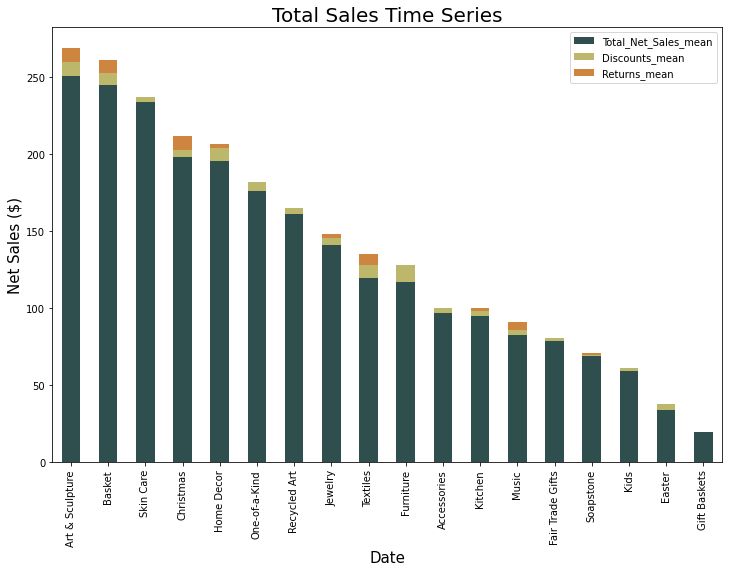

In [60]:
# Stacked bar chart
df.plot(kind='bar', stacked=True)
plt.grid(False)

# labels
plt.title('Total Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Net Sales ($)')

plt.show()

In [13]:
# get only the mean and standard deviation columns for total net sales

# collapse hierachical dataframe
df2 = total_sales.copy()
df2.columns = ['_'.join(col).strip() for col in df2.columns.values]

# Remove everything but net sales mean and net sales standard deviation
df2 = df2[['Total_Net_Sales_mean','Total_Net_Sales_std']]

# make product type into a data column instead of an index
df2.reset_index(inplace=True)

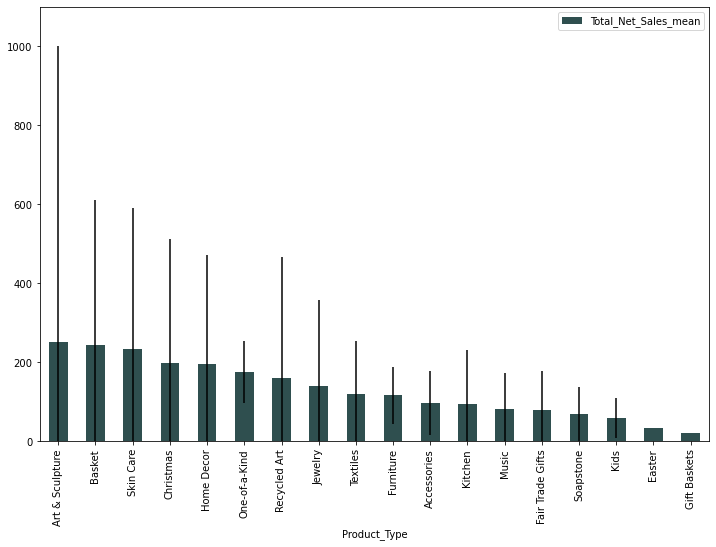

In [14]:
# plot standard deviation and mean of total net sales for each product
df2.plot.bar(x='Product_Type', y='Total_Net_Sales_mean', yerr='Total_Net_Sales_std')
plt.grid(False)
plt.ylim(0,1100)

plt.show()

In [15]:
# View data from business.retails2.csv
display(sales2)
# There are 35 datapoints showing orders, gross sales, net sales, discounts and returns from Janury 2017 through to december 2019

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


### Time Series Plot

In [16]:
# Create a column where month names are converted to integers
Date = []
for i in range(len(sales2['Month'])):
    Date.append(datetime.datetime.strptime(sales2['Month'][i], '%B').month)
sales2['month'] = Date


# Convert month and year columns to datetime
sales2['Date'] = pd.to_datetime(sales2[['Year','month']].assign(DAY=1))


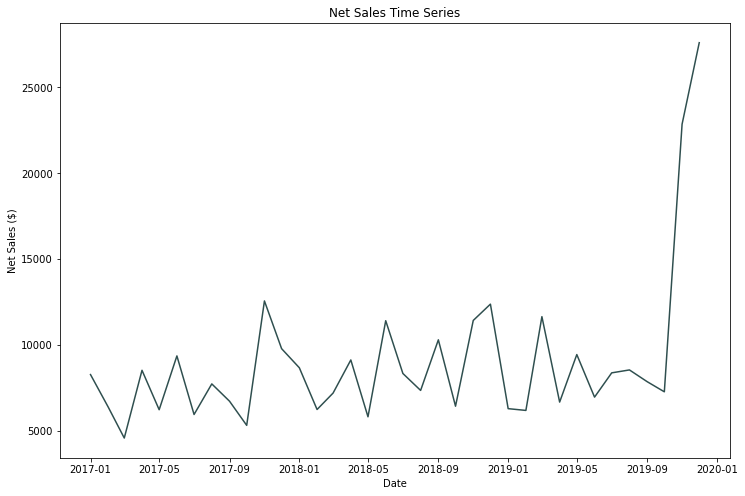

In [17]:
# Net Sales Time Series Plot
plt.plot(sales2['Date'], sales2['Net Sales'])
plt.grid(False)
plt.title('Net Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Net Sales ($)')

plt.show()

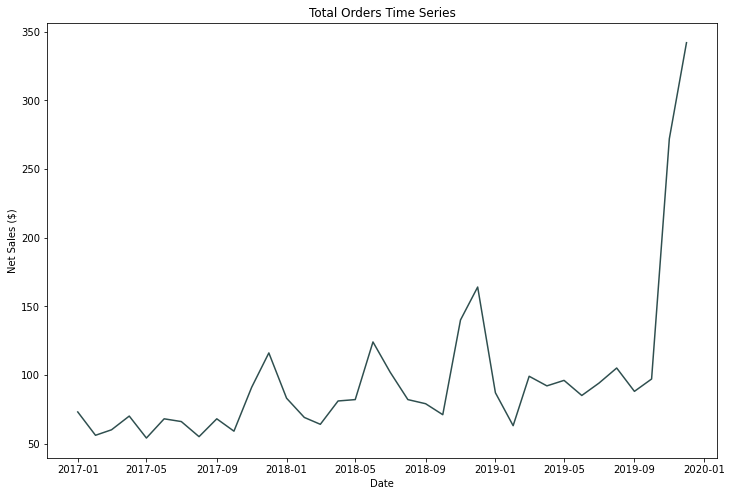

In [18]:
# Total Orders Time Series Plot
plt.plot(sales2['Date'], sales2['Total Orders'])
plt.title('Total Orders Time Series')
plt.xlabel('Date')
plt.ylabel('Net Sales ($)')

plt.grid(False)

plt.show()

### Stacked Bar Graph

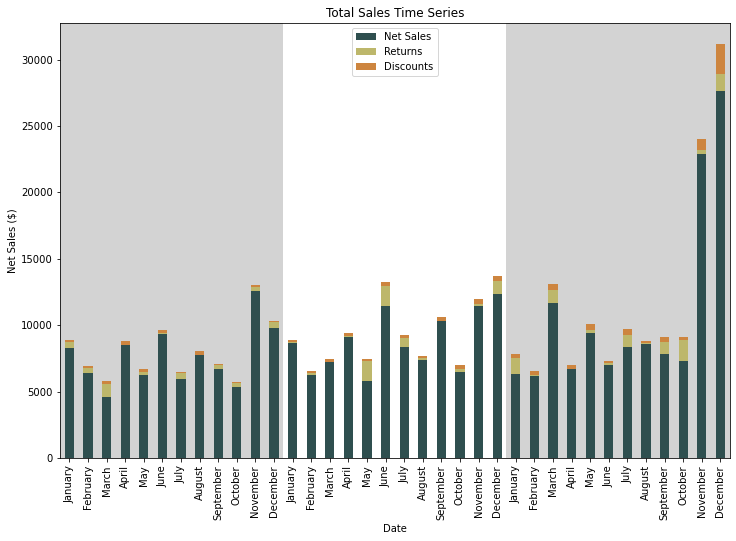

In [19]:
# Stacked bar chart

# Subset dataset to have only net sales, date, discounts and returns
df = sales2[['Date','Net Sales', 'Returns', 'Discounts']]

# Make discounts and returns positive numbers
df[['Discounts', 'Returns']] = df[['Discounts', 'Returns']].abs()

# Set index as date
df = df.set_index('Date')

# Fix X axis tick labels 
x_label = sales2['Month']
x = np.arange(len(x_label))

# Plot
df.plot(kind='bar', stacked=True, zorder=4)

# Background
plt.axvspan(-1, 11.5, facecolor=facecolor)
plt.axvspan(23.5, 40, facecolor=facecolor)
plt.grid(False)

# labels
plt.title('Total Sales Time Series')
plt.xticks(ticks = x, labels = x_label)
plt.xlabel('Date')
plt.ylabel('Net Sales ($)')

plt.show()

# Projections for Q4 of 2020 (oct-dec)

## List of sales per item for Q4